In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("Dataset/gemstone.csv")

In [3]:
data.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [4]:
 data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
data.shape

(193573, 11)

In [6]:
data.size

2129303

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [9]:
data.drop('id',axis=1,inplace=True)

In [10]:
data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [11]:
data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [34]:
# Define Dependant and Independant Features
X = data.drop('price',axis=1)
y = data['price']

In [36]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [37]:
# Seagregate the features
cat_cols = X.columns[X.dtypes == 'object']

In [38]:
num_col = X.columns[X.dtypes != 'object']

In [39]:
num_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [40]:
data[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   carat   193573 non-null  float64
 1   depth   193573 non-null  float64
 2   table   193573 non-null  float64
 3   x       193573 non-null  float64
 4   y       193573 non-null  float64
 5   z       193573 non-null  float64
dtypes: float64(6)
memory usage: 8.9 MB


In [41]:
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cut      193573 non-null  object
 1   color    193573 non-null  object
 2   clarity  193573 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [42]:
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30


In [43]:
for col in cat_cols:
    print(data[col].value_counts())
    print(f'Here is the total count = {len(data[col].value_counts())}')
    print("=======================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
Here is the total count = 5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
Here is the total count = 7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
Here is the total count = 8


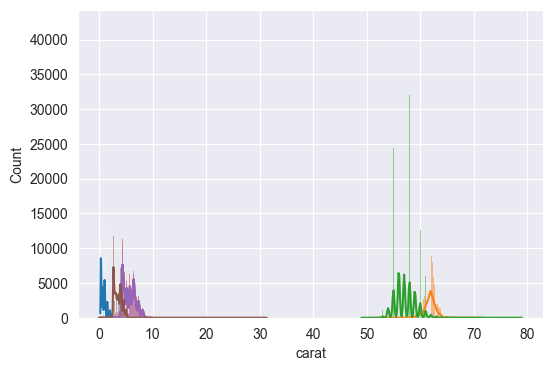

In [44]:
plt.figure(figsize=(6,4))
for col in num_col:
    sns.histplot(data=data,x=col,kde=True)
    print()

<Axes: >

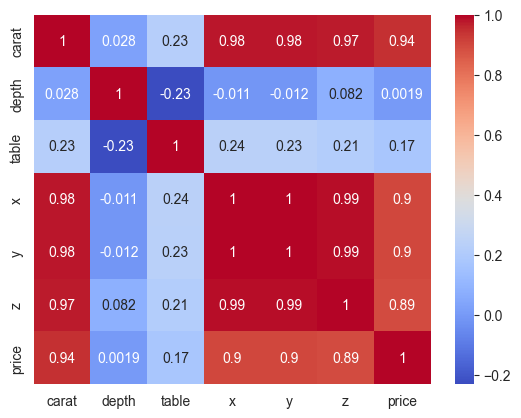

In [22]:
sns.heatmap(data[num_col].corr(),annot=True,cmap='coolwarm')

In [45]:
# Feature Engineering

In [46]:
data[cat_cols]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [47]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [48]:
# Pipeline - Collection of the different different Components
num_trans = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

cat_trans = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
])

In [58]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_trans,num_col),
    ('cat',cat_trans,cat_cols)
])
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=42)

In [60]:
X_train.shape,X_test.shape

((58071, 9), (135502, 9))

In [61]:
X_train = preprocessor.fit_transform(X_train)

In [62]:
X_test = preprocessor.transform(X_test)

In [63]:
X_train

array([[-0.62939971, -0.77157595, -1.16342162, ...,  0.87559981,
         0.28636907,  0.01550546],
       [-0.19935393,  0.81576951, -0.11563604, ...,  0.87559981,
         0.28636907,  2.67749313],
       [ 1.54233148, -0.86494921, -0.11563604, ..., -1.13993707,
        -1.56131122, -1.31548838],
       ...,
       [ 0.9187651 ,  0.90914277,  0.40825675, ..., -0.13216863,
         0.28636907,  0.01550546],
       [-1.0379432 , -0.67820269, -0.63952883, ..., -1.13993707,
         0.28636907,  2.01199621],
       [-1.0379432 , -0.02458985,  0.93214953, ..., -1.13993707,
         0.28636907, -1.31548838]])

In [64]:
preprocessor.get_feature_names_out()

array(['num__carat', 'num__depth', 'num__table', 'num__x', 'num__y',
       'num__z', 'cat__cut', 'cat__color', 'cat__clarity'], dtype=object)

In [67]:
X_train.size,X_test.size

(522639, 1219518)